In [41]:
import netCDF4 as nc
from numpy import *
# import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *
from calc_LRM_metric import *
from calc_LRMobs_metric import *
from fitLRMobs import *

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *

from Aploting_Sep11 import *

In [3]:
# Model list (Global Climate Model);
exp = 'piControl'

# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
# BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
#                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 22 (20, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}


In [4]:

deck2 = [CESM2WACCMFV2, CESM2FV2, TaiESM1, CESM2WACCM, CESM2, SAM0, E3SM10, CMCCCM2SR5, NorESM1M, GFDLCM3, CCSM4, GISSE2H, ECEarth3, GISSE21H, BNUESM, GFDLCM4, CNRMESM21, ECEarth3Veg, IPSLCM5ALR, BCCESM1, CNRMCM61, CNRMCM61HR, MRICGCM3, FGOALSg2, GISSE22G, IPSLCM6ALR, GISSE2R, GISSE21G, bcccsm11, NESM3, NorESM2MM, MRIESM20, CanESM5, FGOALSg3, MIROCES2L, MIROC5, CanESM2, AWICM11MR, MIROC6, FGOALSs2, CSIRO_Mk360, INM_CM48, CNRMCM5, CAMSCSM1, MIROCESM, GFDLESM2G, MPIESM12LR, MPIESMLR, GFDLESM2M, MPIESMMR]
deck_nas2 = ['CESM2WACCMFV2', 'CESM2FV2', 'TaiESM1', 'CESM2WACCM', 'CESM2', 'SAM0', 'E3SM10', 'CMCCCM2SR5', 'NorESM1M', 'GFDLCM3', 'CCSM4', 'GISSE2H', 'ECEarth3', 'GISSE21H', 'BNUESM', 'GFDLCM4', 'CNRMESM21', 'ECEarth3Veg', 'IPSLCM5ALR', 'BCCESM1', 'CNRMCM61', 'CNRMCM61HR', 'MRICGCM3', 'FGOALSg2', 'GISSE22G', 'IPSLCM6ALR', 'GISSE2R', 'GISSE21G', 'bcccsm11', 'NESM3', 'NorESM2MM', 'MRIESM20', 'CanESM5', 'FGOALSg3', 'MIROCES2L', 'MIROC5', 'CanESM2', 'AWICM11MR', 'MIROC6', 'FGOALSs2', 'CSIRO_Mk360', 'INM_CM48', 'CNRMCM5', 'CAMSCSM1', 'MIROCESM', 'GFDLESM2G', 'MPIESM12LR', 'MPIESMLR', 'GFDLESM2M', 'MPIESMMR']

# current gcm # 30 + 20

# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'

In [5]:
# Read two Regimes (Warm, Cold) data:

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
shape_mon_pi_gmt = {}
shape_mon_abr_gmt = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Warm_PI = {}
output_ind_Cold_abr = {}
output_ind_Warm_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    
    # folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest' + '*' + '_dats.npz')
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest'+ '*' + '_dats.npz')
    
    print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
        
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)
        
    else:
        
        folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
    
    output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)
    
    
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    # print(output_2lrm_dict_Albedo, "i", i, output_intermedia[deck_nas2[i]][()].keys())
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    shape_mon_pi_gmt[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_gmt_3']
    shape_mon_abr_gmt[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_gmt_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Warm_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Warm_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')


1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM-FV2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.45_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.42_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/TaiESM1__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-2.18_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.35_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest0.28_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/SAM0-UNICON__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest1.24_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/E3SM-1-0__r2r1_warmcold(Jan)_(largestpiR2)_June7th_23_Anomalies_Rtest-0.95_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_

In [7]:
# Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Warm

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Warm
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

# Changes of variable between 'piControl' (mean-state) and 'abrupt4xCO2' (take 121 - 140 yrs' mean):

# variables including:Cloud Controlling factor (Xi), Liquid Water Path (LWP), and global mean surface air Temperature (GMT)

delta_gmt = full(len(deck2), 0.000)
delta_SST = full((len(deck2), 2), 0.0)  # two Regimes, Cold & Warm
delta_SST_4050 = full((len(deck2), 2), 0.0)
delta_SST_5085 = full((len(deck2), 2), 0.0)
delta_p_e = full((len(deck2), 2), 0.0)
delta_p_e_4050 = full((len(deck2), 2), 0.0)
delta_p_e_5085 = full((len(deck2), 2), 0.0)
delta_LTS = full((len(deck2), 2), 0.0)
delta_LTS_4050 = full((len(deck2), 2), 0.0)
delta_LTS_5085 = full((len(deck2), 2), 0.0)
delta_SUB = full((len(deck2), 2), 0.0)
delta_SUB_4050 = full((len(deck2), 2), 0.0)
delta_SUB_5085 = full((len(deck2), 2), 0.0)

delta_LWP = full((len(deck2), 2), 0.0)
delta_LWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean lwp changes
delta_LWP_4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes
delta_LWP_5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes

# Standardized changes of Variables
# Cloud Controlling factor (Xi) scaled by 'gmt', Liquid Water Path (LWP):

dX_dTg_r1 = full((len(deck2), 4), 0.0)  # Cold
dX_dTg_r1_4050 = full((len(deck2), 4), 0.0)  # Cold regime at 40--50
dX_dTg_r1_5085 = full((len(deck2), 4), 0.0)  # Cold regime at 50--85
dX_dTg_r2 = full((len(deck2), 4), 0.0)  # Warm
dX_dTg_r2_4050 = full((len(deck2), 4), 0.0)  # Warm regime at 40--50
dX_dTg_r2_5085 = full((len(deck2), 4), 0.0)  # Warm regime at 50--85

delta_LWP_dTg_GCM = full((len(deck2)), 0.0)  # Southern Ocean lwp changes scaled by gmt 
delta_LWP_dTg_GCM4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes scaled by gmt
delta_LWP_dTg_GCM5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes scaled by gmt
delta_LWP_dTgr1 = full((len(deck2)), 0.0)  # Cold
delta_LWP_dTgr2 = full((len(deck2)), 0.0)  # Warm

# Coef of LWP to Cloud controlling factors, Xis, for two regimes
# GCM values and the OBS values

stcoef_r1 = full((len(deck2), 4), 0.0)  # Cold
stcoef_r2 = full((len(deck2), 4), 0.0)  # Warm
stcoef_obs = full((4), 0.0)  # Warm Regime Only

In [8]:
# do the calculation:
from copy import deepcopy

f20yr_index = 120*12
l20yr_index = 140*12

#..set area-mean range and define function:
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Warm_PI = output_ind_Warm_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Warm_abr = output_ind_Warm_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Warm_abr)
    
    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    # calc standard_deviation for CCFs at the training period:

    sigmaXi_r1[i,:] = asarray( [nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                         nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = asarray( [nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Warm_PI]), nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Warm_PI]), 
                         nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Warm_PI]), nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Warm_PI])])
    
    sigmaLWP_r1[i] = nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Warm_PI])
    sigmaLWP_ALL[i] = nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Warm_PI)])
    
    # calc changes of variables in two different regimes:
    
    # indice for 'Warm' and 'Cold' regimes corresponding to the last period
    ind_last20_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Cold_abr[0:f20yr_index, :, :] = False
    ind_last20_Cold_abr[l20yr_index:, :, :] = False
    ind_last20_Warm_abr = deepcopy(output_ind_Warm_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Warm_abr[0:f20yr_index, :, :] = False
    ind_last20_Warm_abr[l20yr_index:, :, :] = False
    ind_last20_All_abr = logical_or(ind_last20_Cold_abr, ind_last20_Warm_abr)
    
    ind_last20_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_Warm_PI = deepcopy(output_ind_Warm_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_All_PI = logical_or(ind_last20_Cold_PI, ind_last20_Warm_PI)
    
    LWP_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_all_abr[logical_not(ind_last20_All_abr)] = np.nan
    
    LWP_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_all_PI[logical_not(ind_last20_All_PI)] = np.nan
    
    LWP_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_cold_abr[logical_not(ind_last20_Cold_abr)] = np.nan
    LWP_warm_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_warm_abr[logical_not(ind_last20_Warm_abr)] = np.nan
    LWP_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_cold_PI[logical_not(ind_last20_Cold_PI)] = np.nan
    LWP_warm_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_warm_PI[logical_not(ind_last20_Warm_PI)] = np.nan
    
    delta_LWP_ALL[i] = nanmean(area_mean(LWP_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_all_PI, y_range, x_range))
    # print("Delta LWP 40 -- 85: ", delta_LWP_ALL[i])
    
    delta_LWP_4050[i] = nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_LWP_5085[i] = nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_LWP[i, 0] = nanmean(area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_cold_PI, y_range, x_range))
    delta_LWP[i, 1] = nanmean(area_mean(LWP_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_warm_PI, y_range, x_range))
    # print('1:', area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range))
    # print('2:', area_mean(LWP_cold_PI[:,:,:], y_range, x_range))
    
    
    # SST.
    SST_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_cold_abr[logical_not(ind_last20_Cold_abr)] = np.nan
    SST_warm_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_warm_abr[logical_not(ind_last20_Warm_abr)] = np.nan
    SST_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_cold_PI[logical_not(ind_last20_Cold_PI)] = np.nan
    SST_warm_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_warm_PI[logical_not(ind_last20_Warm_PI)] = np.nan

    delta_SST[i, 0] = nanmean(area_mean(SST_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(SST_cold_PI, y_range, x_range))
    delta_SST[i, 1] = nanmean(area_mean(SST_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(SST_warm_PI, y_range, x_range))
    delta_SST_4050[i, 0] = nanmean(latitude_mean(SST_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(SST_cold_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_SST_4050[i, 1] = nanmean(latitude_mean(SST_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(SST_warm_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_SST_5085[i, 0] = nanmean(latitude_mean(SST_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(SST_cold_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_SST_5085[i, 0] = nanmean(latitude_mean(SST_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(SST_warm_PI, y_range, x_range, lat_range=[-85., -50.]))
    
    # P - E.
    p_e_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_cold_abr[logical_not(ind_last20_Cold_abr)] = np.nan
    p_e_warm_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_warm_abr[logical_not(ind_last20_Warm_abr)] = np.nan
    p_e_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_cold_PI[logical_not(ind_last20_Cold_PI)] = np.nan
    p_e_warm_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_warm_PI[logical_not(ind_last20_Warm_PI)] = np.nan

    delta_p_e[i, 0] = nanmean(area_mean(p_e_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(p_e_cold_PI, y_range, x_range))
    delta_p_e[i, 1] = nanmean(area_mean(p_e_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(p_e_warm_PI, y_range, x_range))
    delta_p_e_4050[i, 0] = nanmean(latitude_mean(p_e_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(p_e_cold_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_p_e_4050[i, 1] = nanmean(latitude_mean(p_e_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(p_e_warm_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_p_e_5085[i, 0] = nanmean(latitude_mean(p_e_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(p_e_cold_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_p_e_5085[i, 0] = nanmean(latitude_mean(p_e_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(p_e_warm_PI, y_range, x_range, lat_range=[-85., -50.]))
    
    # LTS.
    LTS_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_cold_abr[logical_not(ind_last20_Cold_abr)] = np.nan
    LTS_warm_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_warm_abr[logical_not(ind_last20_Warm_abr)] = np.nan
    LTS_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_cold_PI[logical_not(ind_last20_Cold_PI)] = np.nan
    LTS_warm_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_warm_PI[logical_not(ind_last20_Warm_PI)] = np.nan
    
    delta_LTS[i, 0] = nanmean(area_mean(LTS_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LTS_cold_PI, y_range, x_range))
    delta_LTS[i, 1] = nanmean(area_mean(LTS_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LTS_warm_PI, y_range, x_range))
    delta_LTS_4050[i, 0] = nanmean(latitude_mean(LTS_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(LTS_cold_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_LTS_4050[i, 1] = nanmean(latitude_mean(LTS_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(LTS_warm_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_LTS_5085[i, 0] = nanmean(latitude_mean(LTS_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(LTS_cold_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_LTS_5085[i, 0] = nanmean(latitude_mean(LTS_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(LTS_warm_PI, y_range, x_range, lat_range=[-85., -50.]))
    
    # SUB_500.
    SUB_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_cold_abr[logical_not(ind_last20_Cold_abr)] = np.nan
    SUB_warm_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_warm_abr[logical_not(ind_last20_Warm_abr)] = np.nan
    SUB_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_cold_PI[logical_not(ind_last20_Cold_PI)] = np.nan
    SUB_warm_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_warm_PI[logical_not(ind_last20_Warm_PI)] = np.nan
    
    delta_SUB[i, 0] = nanmean(area_mean(SUB_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(SUB_cold_PI, y_range, x_range))
    delta_SUB[i, 1] = nanmean(area_mean(SUB_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(SUB_warm_PI, y_range, x_range))
    delta_SUB_4050[i, 0] = nanmean(latitude_mean(SUB_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(SUB_cold_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_SUB_4050[i, 1] = nanmean(latitude_mean(SUB_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-50., -40.])) - nanmean(latitude_mean(SUB_warm_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_SUB_5085[i, 0] = nanmean(latitude_mean(SUB_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(SUB_cold_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_SUB_5085[i, 0] = nanmean(latitude_mean(SUB_warm_abr[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range=[-85., -50.])) - nanmean(latitude_mean(SUB_warm_PI, y_range, x_range, lat_range=[-85., -50.]))
    
    # gmt.
    gmt_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['gmt']).reshape(shape_mon_abr_gmt[deck_nas2[i]])
    # print(area_mean(gmt_abr[f20yr_index:l20yr_index,: ,: ], s_range, x_range))
    delta_gmt[i] = nanmean(area_mean(gmt_abr[f20yr_index:l20yr_index,: ,: ], s_range, x_range))
    # print(delta_gmt[i])

print("end.")

# print(sigmaXi_r2)

/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/useful_func_cy.py:221: RuntimeWarning: Mean of empty slice
  xx = nanmean(X_time_step, axis=(1)) ## now a vector in latitude- no weights in time or longitude.
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/useful_func_cy.py:229: RuntimeWarning: invalid value encountered in double_scalars
  xx_weight_mean = sum(xx[ind2]*latrad[ind2]) / sum(latrad[ind2])
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: Mean of empty slice
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: Mean of empty sli

end.


In [9]:
# Changes of variables scaled by GMT from GCM output:

for i in range(len(deck_nas2)):
    
    dX_dTg_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]] / delta_gmt[i]).flatten()) / sigmaXi_r1[i, :]  # Cold
    dX_dTg_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]] / delta_gmt[i]).flatten()) / sigmaXi_r2[i, :]  # Warm
    
    delta_LWP_dTg_GCM[i] = (delta_LWP_ALL[i] / delta_gmt[i])   # 40 - 85^{o}S 
    delta_LWP_dTg_GCM4050[i] = (delta_LWP_4050[i] / delta_gmt[i])
    delta_LWP_dTg_GCM5085[i] = (delta_LWP_5085[i] / delta_gmt[i])
    
    delta_LWP_dTgr1[i] = (delta_LWP[i, 0]) / delta_gmt[i]  # Cold 
    delta_LWP_dTgr2[i] = (delta_LWP[i, 1]) / delta_gmt[i]  # Warm


In [10]:
# Standardized dLWP/dXi and non-standardized intercept (residual term) for 50 GCMs:

coef_cold = []
intp_cold = []
coef_warm = []
intp_warm = []

for i in range(len(deck_nas2)):
    # print(output_2lrm_coef_LWP[deck_nas2[i]].shape)
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()   # Cold dLWP/dXi
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()   # Warm dLWP/dXi
    
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()   # Cold intp
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1].copy()   # Warm intp
    
    coef_cold.append(array(a_lt))
    coef_warm.append(array(a_le))
    intp_cold.append(array(a0_lt))
    intp_warm.append(array(a0_le))

for j in range(len(deck_nas2)):
    # print(coef_cold[j].shape)
    # print(sigmaXi_r1[j,:].shape)
    stcoef_r1[j, :] = coef_cold[j] * sigmaXi_r1[j, :]  # Standardized Cold dLWP/dXi
    stcoef_r2[j, :] = coef_warm[j] * sigmaXi_r2[j, :]  # Standardized Warm dLWP/dXi
    
# print(coef_cold, intp_cold)
# print(stcoef_r1[:,:])

In [11]:
# Changes in LWP predicted by CCF model in Equation 3 at different latitudinal bands:

from copy import deepcopy
f20yr_index = 120*12
l20yr_index = 140*12

#..set area-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

delta_LWP_dTg_LRM_all = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_all4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_all5085 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_cold = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_cold4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_cold5085 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_warm = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_warm4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_LRM_warm5085 = full(len(deck_nas2), 0.000)

for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Warm_PI = output_ind_Warm_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Warm_abr = output_ind_Warm_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Warm_abr)
    
    # Indices for choose 'Warm'/ 'Cold' (Added to become non-nan indices) and 
    # the 121--140 yrs period of 'abrupt4xCO2' & the whole period of 'piControl'
    ind_valid_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_valid_Cold_abr[0:f20yr_index, :, :] = False
    ind_valid_Cold_abr[l20yr_index:, :, :] = False
    ind_valid_Warm_abr = deepcopy(output_ind_Warm_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_valid_Warm_abr[0:f20yr_index, :, :] = False
    ind_valid_Warm_abr[l20yr_index:, :, :] = False
    ind_valid_All_abr = logical_or(ind_valid_Cold_abr, ind_valid_Warm_abr)
    
    ind_valid_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_valid_Warm_PI = deepcopy(output_ind_Warm_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_valid_All_PI = logical_or(ind_valid_Cold_PI, ind_valid_Warm_PI)
    print(deck_nas2[i])
    
    # LWP.
    LWP_abr_all = deepcopy(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_all[logical_not(ind_valid_All_abr)] = np.nan
    # print("Mean LWP abr all: ", nanmean(area_mean(LWP_abr_all, y_range, x_range)))
    LWP_PI_all = deepcopy(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_all[logical_not(ind_valid_All_PI)] = np.nan
    # print("Mean LWP PI all: ", nanmean(area_mean(LWP_PI_all, y_range, x_range)))
    LWP_abr_cold = deepcopy(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_cold[logical_not(ind_valid_Cold_abr)] = np.nan
    LWP_abr_warm = deepcopy(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_warm[logical_not(ind_valid_Warm_abr)] = np.nan
    LWP_PI_cold = deepcopy(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_cold[logical_not(ind_valid_Cold_PI)] = np.nan
    LWP_PI_warm = deepcopy(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_warm[logical_not(ind_valid_Warm_PI)] = np.nan
    
    # Changes in LWP scaled by GMT.
    
    delta_LWP_dTg_LRM_all[i] = (nanmean(area_mean(LWP_abr_all[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_all, y_range, x_range))) / delta_gmt[i]
    delta_LWP_dTg_LRM_all4050[i] = (nanmean(latitude_mean(LWP_abr_all[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_all, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_LRM_all5085[i] = (nanmean(latitude_mean(LWP_abr_all[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_all, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    # print("Delta LWP/Delta GMT 40 -- 85: ", delta_LWP_dTg_LRM_all[i])
    delta_LWP_dTg_LRM_cold[i] = (nanmean(area_mean(LWP_abr_cold[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_cold, y_range, x_range))) / delta_gmt[i]
    delta_LWP_dTg_LRM_cold4050[i] = (nanmean(latitude_mean(LWP_abr_cold[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_cold, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_LRM_cold5085[i] = (nanmean(latitude_mean(LWP_abr_cold[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_cold, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    # print("Delta LWP/Delta GMT at Cold of 40 -- 85: ", delta_LWP_dTg_LRM_cold[i])
    delta_LWP_dTg_LRM_warm[i] = (nanmean(area_mean(LWP_abr_warm[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_warm, y_range, x_range))) / delta_gmt[i]
    delta_LWP_dTg_LRM_warm4050[i] = (nanmean(latitude_mean(LWP_abr_warm[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_warm, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_LRM_warm5085[i] = (nanmean(latitude_mean(LWP_abr_warm[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_warm, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    print("Delta LWP/Delta GMT at Warm of 40 -- 85: ", delta_LWP_dTg_LRM_warm[i])

CESM2WACCMFV2


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice


Delta LWP/Delta GMT at Warm of 40 -- 85:  0.00018118697199157765
CESM2FV2
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0003962264179845122
TaiESM1
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0025371162169501226
CESM2WACCM
Delta LWP/Delta GMT at Warm of 40 -- 85:  -0.00027271370039541154
CESM2
Delta LWP/Delta GMT at Warm of 40 -- 85:  -0.00013878056276706157
SAM0
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.001142360794393095
E3SM10
Delta LWP/Delta GMT at Warm of 40 -- 85:  -0.0002674774461187188
CMCCCM2SR5
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0013699090244049532
NorESM1M
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0009665874036739001
GFDLCM3
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0017197330713484868
CCSM4
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0009510135921724067
GISSE2H
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.0035391721199248528
ECEarth3
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.001849648276960146
GISSE21H
Delta LWP/Delta GMT at Warm of 40 -- 85:  0.00254539860306

In [12]:
print(delta_gmt)

[6.11149976 6.55952266 6.43849753 6.5835812  7.41990645 5.5439165
 8.56044032 5.9856942  4.18448871 5.81370906 4.71481454 4.02897363
 6.79274059 4.91945816 6.12281981 5.85139245 6.02772362 7.23372147
 5.78405303 4.91544518 6.79711466 6.67460222 4.4530524  5.15136502
 3.63508084 7.09938351 3.41329718 4.20922349 4.76889286 6.94376083
 3.94143312 4.84115926 7.84786322 4.52269176 4.00666793 4.32490788
 5.81223918 5.378226   3.93013682 5.7990585  5.66157738 3.50020277
 5.17997085 4.25246086 6.54951982 3.76827361 4.88261398 5.88331216
 3.80105494 5.67263949]


In [42]:
# Observational dLWP/dXi:

# Training Period:
valid_range1=[2012, 1, 15]
valid_range2=[2016, 12, 31]   # 5 years

# Validating Period:
valid_range3=[1992, 1, 15]
valid_range4=[2011, 12, 31]   # 20 years


# Pre-processing data in the training period and validation period:
dict_training, lats_Array, lons_Array, times_Array_training = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range1, valid_range2 = valid_range2)
dict_predict, lats_Array, lons_Array, times_Array_predict = Pre_processing(s_range, x_range, y_range, valid_range1 = valid_range3, valid_range2 = valid_range4)

# Compute the OBS coefs from training period data (Coefs are not sensitive to the time period chosen):

predict_result_1r = fitLRMobs_1(dict_training, dict_predict, s_range, y_range, x_range, lats_Array, lons_Array)

# Observational dLWP/dXi in units of kg*m^-2/ (raw unit).

coef_obs = predict_result_1r['coef_dict']
print(coef_obs)

# Convert Observational dLWP/dXi from kg*m^-2/ unit to g*m^-2/ (std*dev)
# std_dev_LWP = predict_result_1r['std_LWP_training']

sigmaXi_r2_obs = np.full((4), 0.0)
sigmaXi_r2_obs = np.asarray([np.nanstd(dict_training['SST']), np.nanstd(dict_training['p_e']), np.nanstd(dict_training['LTS']), np.nanstd(dict_training['SUB'])])
# print(sigmaXi_r2_obs)

a = 1000. * coef_obs[0] * sigmaXi_r2_obs
# print(a)

(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[2012 2013 2014 2015 2016]


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  return array(a, dtype, copy=False, order=order)


Fill Value:  -999.0
(60, 45, 360)
Fill Value:  -999.0
(60, 45, 360)
Fill Value:  -999.0
(60, 45, 360)


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/calc_LRMobs_metric.py:153: RuntimeWarning: invalid value encountered in less_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/calc_LRMobs_metric.py:153: RuntimeWarning: invalid value encountered in greater_equal
  albedo_cs[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/calc_LRMobs_metric.py:154: RuntimeWarning: invalid value encountered in less_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/calc_LRMobs_metric.py:154: RuntimeWarning: invalid value encountered in greater_equal
  Alpha_cre[(albedo_cs <= 0.08) & (albedo_cs >= 1.00)] == np.nan
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/calc_LRMobs_metric.py:156: RuntimeWarning: invalid value encountered in 

 ended cropping 
 ended cropping 
End monthly data binned.
End annual data binned.
(42,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011]
Fill Value:  -999.0
(114, 45, 360)
Fill Value:  -999.0
(114, 45, 360)
Fill Value:  -999.0
(114, 45, 360)
 ended cropping 
 ended cropping 
End monthly data binned.
End annual data binned.
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
(60, 9, 72)
predictors metrix shape:  (4, 38880)
shape1:  (38880,)
shape2:  (1, 20247)
 Total # of regime 1
(4, 155520)
shape1:  (155520,)
shape2:  (1, 80311)
 Total # of regime 1
current # of regimes 0
[array([ 3.15875303e-03,  1.30166364e-02, -3.89038028e-05,  1.38525849e-01])
 -0.8094440706555828]


In [43]:
# Changes in LWP at different Lat bands predicted by CCF model in Equation 3 with: OBS sensitivity at "Warm" + GCM sensitivities at "Cold" Regime.

f20yr_index = 120*12
l20yr_index = 140*12

# assemble a coef_dict with: OBS coef+intercept at "Warm" + GCMs Cold Regime coef+intercept at "Cold";

Coef_dict_assemble = {}
Ano_metric_training = {}
Ano_metric_predict = {}

delta_LWP_dTg_OBS_cold = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_cold4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_cold5085 = full(len(deck_nas2), 0.000)

delta_LWP_dTg_OBS_warm = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_warm4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_warm5085 = full(len(deck_nas2), 0.000)

delta_LWP_dTg_OBS_all = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_all4050 = full(len(deck_nas2), 0.000)
delta_LWP_dTg_OBS_all5085 = full(len(deck_nas2), 0.000)

coef_obs_test = coef_obs

for i in range(len(deck_nas2)):
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()
    print(a_lt, a0_lt)
    Coef_dict_assemble[deck_nas2[i]] = asarray([[a_lt, a0_lt], coef_obs_test])
    
    # Re-predict the training dataset and predict dataset with assembled coef dict:
    Ano_metric_training[deck_nas2[i]] = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]])
    Ano_metric_predict[deck_nas2[i]] = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]])
    
    # Retrive TR_Ts:
    
    WD = '/glade/scratch/chuyan/CMIP_output/CMIP_partition_RESULT/'
    folder = glob.glob(WD+ deck_nas2[i]+'__'+ 'STAT_pi+abr_'+'22x_31y_June7_23_anomalies' + '.npz')
    # print(folder)
    output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
    TR_sst2 = output_ARRAY['TR_maxR2_SST']
    TR_sub2 = output_ARRAY['TR_maxR2_SUB']
    # print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')
    
    # Predicting LWP:
    #.. piControl
    predict_dict_PI, ind6_PI, ind7_PI, shape_fla_training = rdlrm_2_predict(Ano_metric_training[deck_nas2[i]], Coef_dict_assemble[deck_nas2[i]], TR_sst2, predictant='LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
    # 'YB' is the predicted value of LWP in 'piControl' experiment
    YB = predict_dict_PI['value']
    # Save 'YB', and resampled into the shape of 'LWP_yr_bin':
    LWP_predi_bin_PI = asarray(YB).reshape(shape_mon_pi[deck_nas2[i]])
    
    #.. abrupt4xCO2
    
    predict_dict_abr, ind6_abr, ind7_abr, shape_fla_testing = rdlrm_2_predict(Ano_metric_predict[deck_nas2[i]], Coef_dict_assemble[deck_nas2[i]], TR_sst2, predictant = 'LWP', predictor = ['SST', 'p_e', 'LTS', 'SUB'], r = 2)
    # 'YB_abr' is the predicted value of LWP in 'abrupt 4xCO2' experiment
    YB_abr = predict_dict_abr['value']
    # Save 'YB_abr', reshapled into the shape of 'LWP_yr_bin_abr':
    LWP_predi_bin_abr = asarray(YB_abr).reshape(shape_mon_abr[deck_nas2[i]])
    
    # Processing:
    
    # # indice of Regimes;
    # ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    # ind_Warm_PI = output_ind_Warm_PI[deck_nas2[i]]
    # ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    # ind_Warm_abr = output_ind_Warm_abr[deck_nas2[i]]

    # Indices for choose 'Warm'/ 'Cold' (Added to become non-nan indices) and 
    # the 121--140 yrs period of 'abrupt4xCO2' & the whole period of 'piControl'
    ind_valid_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_valid_Cold_abr[0:f20yr_index, :, :] = False
    ind_valid_Cold_abr[l20yr_index:, :, :] = False
    ind_valid_Warm_abr = deepcopy(output_ind_Warm_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_valid_Warm_abr[0:f20yr_index, :, :] = False
    ind_valid_Warm_abr[l20yr_index:, :, :] = False
    ind_valid_All_abr = logical_or(ind_valid_Cold_abr, ind_valid_Warm_abr)
    
    ind_valid_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_valid_Warm_PI = deepcopy(output_ind_Warm_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_valid_All_PI = logical_or(ind_valid_Cold_PI, ind_valid_Warm_PI)
    
    # LWP predicting by assembled coef dict.
    LWP_abr_all = deepcopy(LWP_predi_bin_abr).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_all[logical_not(ind_valid_All_abr)] = np.nan
    
    LWP_PI_all = deepcopy(LWP_predi_bin_PI).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_all[logical_not(ind_valid_All_PI)] = np.nan
    
    LWP_abr_cold = deepcopy(LWP_predi_bin_abr).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_cold[logical_not(ind_valid_Cold_abr)] = np.nan
    LWP_abr_warm = deepcopy(LWP_predi_bin_abr).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_abr_warm[logical_not(ind_valid_Warm_abr)] = np.nan
    LWP_PI_cold = deepcopy(LWP_predi_bin_PI).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_cold[logical_not(ind_valid_Cold_PI)] = np.nan
    LWP_PI_warm = deepcopy(LWP_predi_bin_PI).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_PI_warm[logical_not(ind_valid_Warm_PI)] = np.nan
    
    # Changes in LWP scaled by GMT.
    
    delta_LWP_dTg_OBS_all[i] = (nanmean(area_mean(LWP_abr_all[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_all, y_range, x_range))) / delta_gmt[i]
    delta_LWP_dTg_OBS_all4050[i] = (nanmean(latitude_mean(LWP_abr_all[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_all, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_OBS_all5085[i] = (nanmean(latitude_mean(LWP_abr_all[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_all, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    # print("Delta LWP/Delta GMT with OBS constraint for SO Averaged:", delta_LWP_dTg_OBS_all[i])
    delta_LWP_dTg_OBS_cold[i] = (nanmean(area_mean(LWP_abr_cold[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_cold, y_range, x_range))) / delta_gmt[i]
    delta_LWP_dTg_OBS_cold4050[i] = (nanmean(latitude_mean(LWP_abr_cold[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_cold, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_OBS_cold5085[i] = (nanmean(latitude_mean(LWP_abr_cold[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_cold, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    
    delta_LWP_dTg_OBS_warm[i] = (nanmean(area_mean(LWP_abr_warm[f20yr_index:l20yr_index,:,:], y_range, x_range)) - nanmean(area_mean(LWP_PI_warm, y_range, x_range))) / delta_gmt[i]
    print("Delta LWP/Delta GMT with OBS constraint for Warm Regime in the SO:", delta_LWP_dTg_OBS_warm[i])
    delta_LWP_dTg_OBS_warm4050[i] = (nanmean(latitude_mean(LWP_abr_warm[f20yr_index:l20yr_index,:,:], y_range, x_range, lat_range= [-50., -40.])) - nanmean(latitude_mean(LWP_PI_warm, y_range, x_range, lat_range= [-50., -40.]))) / delta_gmt[i]
    delta_LWP_dTg_OBS_warm5085[i] = (nanmean(latitude_mean(LWP_abr_warm[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range= [-85., -50.])) - nanmean(latitude_mean(LWP_PI_warm, y_range, x_range, lat_range= [-85., -50.]))) / delta_gmt[i]
    
    # print(Ano_metric_predict)

[ 0.00179464  0.00515463 -0.00025227  0.09661935] -0.008004403071866138
(769824,)
shape1:  (769824,)
shape2:  (1, 701994)
 Total # of regime 2
current # of regimes 0
current # of regimes 1
(1166400,)
shape1:  (1166400,)
shape2:  (1, 1069060)
 Total # of regime 2
current # of regimes 0
current # of regimes 1


/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/useful_func_cy.py:221: RuntimeWarning: Mean of empty slice
  xx = nanmean(X_time_step, axis=(1)) ## now a vector in latitude- no weights in time or longitude.
/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/useful_func_cy.py:229: RuntimeWarning: invalid value encountered in double_scalars
  xx_weight_mean = sum(xx[ind2]*latrad[ind2]) / sum(latrad[ind2])
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: Mean of empty slice


Delta LWP/Delta GMT with OBS constraint for Warm Regime in the SO: 0.002708721348068636
[ 0.00180323  0.00538214 -0.00025816  0.10315365] -0.010403971453346539
(770472,)
shape1:  (770472,)
shape2:  (1, 702381)
 Total # of regime 2
current # of regimes 0
current # of regimes 1
(1166400,)
shape1:  (1166400,)
shape2:  (1, 1068114)
 Total # of regime 2
current # of regimes 0
current # of regimes 1
Delta LWP/Delta GMT with OBS constraint for Warm Regime in the SO: 0.002566014939777181
[ 1.05134692e-04  1.33723135e-03 -7.02888111e-05  1.60027362e-02] -0.028882545276398053
(771120,)
shape1:  (771120,)
shape2:  (1, 771120)
 Total # of regime 2
current # of regimes 0
current # of regimes 1
(1166400,)
shape1:  (1166400,)
shape2:  (1, 1166400)
 Total # of regime 2
current # of regimes 0
current # of regimes 1
Delta LWP/Delta GMT with OBS constraint for Warm Regime in the SO: 0.0026874483679120587
[ 0.00189797  0.01173497 -0.00048025  0.08554448] -0.017029529160439677
(769824,)
shape1:  (769824,)


### Fig 6:

Plotting the Equation 3 predicted LWP responses and GCMs-output LWP responses in 3 latitudinal bands:

And add observational constraint

In [44]:
from scipy.optimize import curve_fit

def target_func(x, m, k):
    
    '''
    1-d line linear fit
    '''
    y = m * x + k
    return y

def calc_r2(Y_pre, Y):

    residual_ydata = array(Y).reshape(-1,1) - array(Y_pre).reshape(-1,1)
    
    ss_res_bar  = (residual_ydata**2).sum()
    ss_tot_bar  = ((Y - Y.mean())**2).sum()
    R_square = 1. - (ss_res_bar/ss_tot_bar)

    return R_square


In [45]:
# Jackknife estimator of the uncertainties in the slope and intercept of the fitting line:

def Jackknife(X, Y, x_axis):
    
    M = np.zeros((len(X), 2))

    POPT_2, POCV_2 = curve_fit(target_func, 1000.* delta_LWP_dTg_LRM_warm, 1000.* delta_LWP_dTg_LRM_all)
    for j, val in enumerate(X):

        X2 = np.delete(X, j)
        Y2 = np.delete(Y, j)

        Fit_jackknife = np.polyfit(X2, Y2, 1)

        M[j, 0] = Fit_jackknife[0]
        M[j, 1] = Fit_jackknife[1]


    # the mean of jackknife_slope and jackknife_intercept:
    mean_slope = np.mean(M[:, 0])
    mean_intercept = np.mean(M[:, 1])

    # estimate the 95% bound of the slope and intercept:
    perc95_slope = np.percentile(M[:,0], 95)
    perc5_slope = np.percentile(M[:,0], 5)

    perc95_intercept = np.percentile(M[:, 1], 95)
    perc5_intercept = np.percentile(M[:, 1], 5)
    print('5%-95% bounds of jackknife_Slope: '+str(perc5_slope)+' - ' +str(perc95_slope))
    print('5%-95% bounds of jackknife_y_intercept: '+str(perc5_intercept)+' - ' +str(perc95_intercept))

    # # Plot examine the distribution of jackknife_slope:
    # xint = np.arange(np.min(M[:,0]), np.max(M[:,0]), (perc95_slope - perc5_slope) /18.)
    # y, bin_edges = np.histogram(M[:,0],xint)
    # plt.plot(bin_edges[:-1], y/float(len(M)), color = 'black', linewidth = 0.5)

    # # Plot examine the distribution of jackknife_intercept:
    # xint = np.arange(np.min(M[:,1]), np.max(M[:,1]), (perc95_intercept - perc5_intercept) /18.)
    # y, bin_edges = np.histogram(M[:,1],xint)
    # plt.plot(bin_edges[:-1], y/float(len(M)), color = 'blue', linewidth = 0.5)

    # Shading Array for fitting line estimated by jackknife:
    fittingline_error = np.zeros((len(M[:, 0]), len(x_axis)))

    for i in range(len(M)):

        fittingline_error[i, :] = x_axis* M[i,0] +M[i,1]

    best_fit_lines_min = np.min(fittingline_error, axis=0)
    best_fit_lines_max = np.max(fittingline_error, axis=0)
    
    return best_fit_lines_min, best_fit_lines_max
    

minimum x1 index: 30
x1: 1.7135057927114345 x2: 3.182589306388939
Correlation coefficient(r):  0.9269495778884057
5%-95% bounds of jackknife_Slope: 0.8237502784869768 - 0.8443524410608141
5%-95% bounds of jackknife_y_intercept: 1.0380710991638376 - 1.1356628111970122
11800
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum:  2.4543053794171072
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum:  3.7658612323497147
[2, 9, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 33, 34, 35]


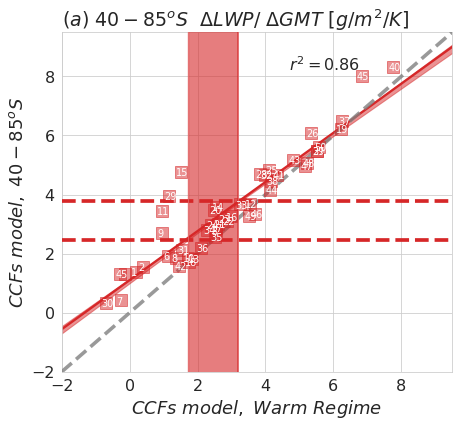

In [46]:
# Constraint on CCF model predicted 40 -- 85^{o} S band averaged LWP response Only from OBS constraint on the warm regime in this band:

sns.set_style("whitegrid")
import matplotlib.pyplot as plt

# plot settings:
parameters = {'axes.labelsize': 18, 'legend.fontsize': 16,
       'axes.titlesize': 19, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(parameters)

fig2, axes2 = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51, 1)

x = np.linspace(-2.0, 9.8, 50)
y = x
x_axis = np.arange(-2.0, 9.8, 0.001)

x1 = np.min(1000.* delta_LWP_dTg_OBS_warm)
print('minimum x1 index:', np.argmin(1000.* delta_LWP_dTg_OBS_warm))
x2 = np.max(1000.* delta_LWP_dTg_OBS_warm)
print("x1:", x1, "x2:", x2)

# Observational constraint on Warm regime d(LWP)/d(GMT):
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:red", alpha = 0.6, zorder = 15)
plt.axvline(x1, c = "tab:red", alpha = 0.6, linewidth = 1.4, zorder = 15)
plt.axvline(x2, c = "tab:red", alpha = 0.6, linewidth = 2, zorder = 15)

plot_scat1 = []
plot_scat2 = []

for a in range(len(deck_nas2)):
    
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_warm[a], 1000.* delta_LWP_dTg_LRM_all[a], s = 134, marker = 's', color="tab:red", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)

    # Add GCM ordinal number listed in Table S1:
    axes2.annotate(n_name[a], xy=(1000.* delta_LWP_dTg_LRM_warm[a], 1000.* delta_LWP_dTg_LRM_all[a]),
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)

# linear curve fit between Equation 3 predicted latitudinal-averaged d(LWP)/d(GMT) and warm regime d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000.* delta_LWP_dTg_LRM_warm, 1000.* delta_LWP_dTg_LRM_all)

# Calc the r and R^2, plot the fit line:

pearsonr_2 = pearsonr(1000. *delta_LWP_dTg_LRM_warm, 1000. *delta_LWP_dTg_LRM_all)[0]
R_square_2 = calc_r2(1000.* delta_LWP_dTg_LRM_warm, 1000.* delta_LWP_dTg_LRM_all)
print("Correlation coefficient(r): ", pearsonr_2)

fitp3 = axes2.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:red", linewidth = 2.3)

# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000.* delta_LWP_dTg_LRM_warm
Y = 1000.* delta_LWP_dTg_LRM_all
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
print(len(best_fit_lines_min))
axes2.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:red", alpha= 0.5)

# Add Reference line:
Refp = axes2.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)  # Blue

# Add constraint on Latitudinal-averaged d(LWP)/d(GMT) indicated by horizontal line 2, 3
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range = best_fit_lines_min[index_min]
Horit2 = axes2.plot(x, [y1_all_OBS_range] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range = POPT_2[0] * x1 + POPT_2[1]

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range = best_fit_lines_max[index_max]
Horit3 = axes2.plot(x, [y2_all_OBS_range] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 7)
# y2_all_OBS_range = POPT_2[0] * x2 + POPT_2[1]

# Add text for the Correlation coeffcient:
axes2.text(4.705, 8.200, r"$r^{2} = %.2f $" % pearsonr_2**2, fontsize = 16)

print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum: ", y1_all_OBS_range)
print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum: ", y2_all_OBS_range)


# Plot setting:
axes2.set_xlim(-2.0, 9.5)
axes2.set_ylim(-2.0, 9.5)
axes2.set_xlabel(r"$ CCFs\ model,\ Warm\ Regime$")
axes2.set_ylabel(r"$ CCFs\ model,\ 40-85^{o}S$")
axes2.set_title( r"$ (a)\ {40-85^{o}S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(a)_4085.jpg', bbox_inches = 'tight', dpi = 500)

# determine the OBS range of 'Warm' Regime constraint

OBS_range_model1 = []
for a in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_warm[a] > x1) & (1000.* delta_LWP_dTg_LRM_warm[a] < x2):
        
        OBS_range_model1.append(int(a))

print(OBS_range_model1)

R^2:  0.666995093125031
5%-95% bounds of jackknife_Slope: 0.908238695320082 - 0.939143993084699
5%-95% bounds of jackknife_y_intercept: 0.5893450296791121 - 0.725034654123271
OBS constraint GCM-predicted Latitudinal-averaged range minimum:  2.7556076672271845
OBS constraint GCM-predicted Latitudinal-averaged range maximum:  4.188623342519838
[2, 8, 10, 11, 13, 15, 16, 19, 20, 21, 22, 23, 32, 33, 34, 45, 48]
[2, 13, 15, 16, 19, 20, 21, 22, 23, 33, 34]
9.325823226216473 0.6419698082505203


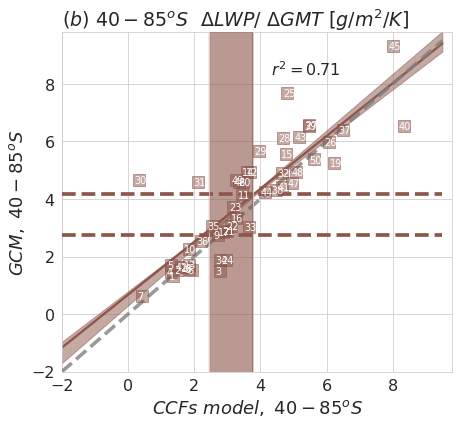

In [47]:
# Constraint on GCM output 40 -- 85^{o} S band averaged LWP response from the constriant on CCF model predicted latitudinal-averaged LWP response:

fig, axes = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51,  1)

x = linspace(-2.0, 9.5, 50)
y = x
x_axis = np.arange(-2.0, 9.5, 0.001)

x1 = y1_all_OBS_range
x2 = y2_all_OBS_range

# First propagated Latitudinal-Averaged constraint on d(LWP)/d(GMT) from CCF model:
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:brown", alpha = 0.6, zorder = 9)
plt.axvline(x1, c = "tab:brown", alpha = 0.6, linewidth = 1.4)
plt.axvline(x2, c = "tab:brown", alpha = 0.6, linewidth = 2)

plot_scat1 = []
plot_scat2 = []

for b in range(len(deck_nas2)):
    
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_all[b], 1000.* delta_LWP_dTg_GCM[b], s = 132, marker = 's', color="tab:brown", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)
    
    # Add GCM ordinal number listed in Table S1:
    axes.annotate(n_name[b], xy = (1000.* delta_LWP_dTg_LRM_all[b], 1000.* delta_LWP_dTg_GCM[b]), 
        xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)


# linear curve fit between Equation 3 predicted and GCM predicted latitudinal-averaged d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000. * delta_LWP_dTg_LRM_all, 1000. * delta_LWP_dTg_GCM)

# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(1000. * delta_LWP_dTg_LRM_all, 1000. * delta_LWP_dTg_GCM)[0]
R_square_2 = calc_r2(1000. * delta_LWP_dTg_LRM_all, 1000. * delta_LWP_dTg_GCM)
print("R^2: ", R_square_2)

fitp3 = axes.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:brown", linewidth = 2.3)

# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000.* delta_LWP_dTg_LRM_all
Y = 1000. * delta_LWP_dTg_GCM
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
# print(len(best_fit_lines_min))
axes.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:brown", alpha= 0.5)

# Add Reference line:
Refp = axes.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)

# Add constraint on Latitudinal-averaged d(LWP)/d(GMT) indicated by horizontal line 2, 3:
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range2 = best_fit_lines_min[index_min]
Horit2 = axes.plot(x, [y1_all_OBS_range2] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range2 = POPT_2[0] * x1 + POPT_2[1]

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range2 = best_fit_lines_max[index_max]
Horit2 = axes.plot(x, [y2_all_OBS_range2] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y2_all_OBS_range2 = POPT_2[0] * x2 + POPT_2[1]

# Add text for the R_square:
axes.text(4.320, 8.280, r"$r^{2} = %.2f $" % pearsonr_2**2, fontsize = 16)

print("OBS constraint GCM-predicted Latitudinal-averaged range minimum: ", y1_all_OBS_range2)
print("OBS constraint GCM-predicted Latitudinal-averaged range maximum: ", y2_all_OBS_range2)

axes.set_xlim([-2.0, 9.8])
axes.set_ylim([-2.0, 9.8])
axes.set_xlabel(r"$ CCFs\ model,\ 40-85^{o}S$")
axes.set_ylabel(r"$ GCM,\ 40-85^{o}S$")

axes.set_title( r"$ (b)\ {40- 85^{o}S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(b)_4085.jpg', bbox_inches = 'tight', dpi = 500)


# Determine the OBS range of 'ALL' Regime Constraint; 

OBS_range_model2 = []

for b in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_all[b] >= x1) & (1000.* delta_LWP_dTg_LRM_all[b] <= x2):
        
        OBS_range_model2.append(int(b))

print(OBS_range_model2)

OBS_range_MODEL_common = []

for J in range(len(OBS_range_model2)):
    
    if OBS_range_model2[J] in OBS_range_model1:
        
        OBS_range_MODEL_common.append(OBS_range_model2[J])

print(OBS_range_MODEL_common)


print(np.max(1000.* delta_LWP_dTg_GCM), np.min(1000.* delta_LWP_dTg_GCM))

minimum x1 index: 48
x1: 1.4445989779023591 x2: 2.590009084399921
Correlation coefficient(r):  0.9999969564496258
5%-95% bounds of jackknife_Slope: 1.0003000668125863 - 1.000357767926996
5%-95% bounds of jackknife_y_intercept: -0.0008330341366535367 - -0.0007357371177268313
16000
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum:  1.4444836692159344
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum:  2.5908644671715364
[7, 11, 12, 16, 17, 20, 22, 23, 31, 33, 34, 35, 41, 45, 48]


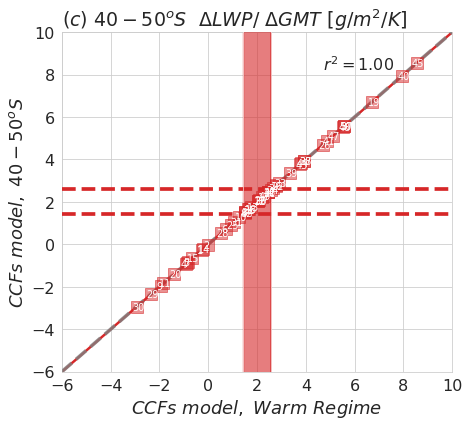

In [48]:
# Constraint on 40 -- 50^{o} S band averaged LWP response Only from OBS constraint on the warm regime in this band:

fig2, axes2 = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51, 1)

x = linspace(-6.00, 10.000, 50)
y = x
x_axis = np.arange(-6.00, 10.000, 0.001)

plot_scat1 = []
plot_scat2 = []

x1 = np.min(1000.* delta_LWP_dTg_OBS_warm4050)
print('minimum x1 index:', np.argmin(1000.* delta_LWP_dTg_OBS_warm4050))
x2 = np.max(1000.* delta_LWP_dTg_OBS_warm4050)
print("x1:", x1, "x2:", x2)

# Observational constraint on Warm regime d(LWP)/d(GMT):
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:red", alpha = 0.6, zorder = 9)
plt.axvline(x1, c = "tab:red", alpha = 0.6, linewidth = 1.4)
plt.axvline(x2, c = "tab:red", alpha = 0.6, linewidth = 2)

for a in range(len(deck_nas2)):
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_warm4050[a], 1000.* delta_LWP_dTg_LRM_all4050[a], s = 134, marker = 's', color="tab:red", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)
    
    # Add GCM ordinal number listed in Table S1:
    axes2.annotate(n_name[a], xy=(1000.* delta_LWP_dTg_LRM_warm4050[a], 1000.* delta_LWP_dTg_LRM_all4050[a]),
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)


# linear curve fit between Equation 3 predicted latitudinal-averaged d(LWP)/d(GMT) and warm regime d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000.* delta_LWP_dTg_LRM_warm4050, 1000.* delta_LWP_dTg_LRM_all4050)

# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(1000. *delta_LWP_dTg_LRM_warm4050, 1000. *delta_LWP_dTg_LRM_all4050)[0]
R_square_2 = calc_r2(1000.* delta_LWP_dTg_LRM_warm4050, 1000.* delta_LWP_dTg_LRM_all4050)
print("Correlation coefficient(r): ", pearsonr_2)

fitp3 = axes2.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:red", linewidth = 2.3)

# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000.* delta_LWP_dTg_LRM_warm4050
Y = 1000.* delta_LWP_dTg_LRM_all4050
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
print(len(best_fit_lines_min))
axes2.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:red", alpha= 0.5)

# Add Reference line:
Refp = axes2.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)

# Add constraint on Latitudinal-averaged d(LWP)/d(GMT) indicated by horizontal line 2, 3
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range_4050 = best_fit_lines_min[index_min]
Horit2 = axes2.plot(x, [y1_all_OBS_range_4050] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range_4050 = POPT_2[0] * x1 + POPT_2[1]

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range_4050 = best_fit_lines_max[index_max]
Horit3 = axes2.plot(x, [y2_all_OBS_range_4050] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 7)
# y2_all_OBS_range_4050 = POPT_2[0] * x2 + POPT_2[1]

# Add text for the Correlation coeffcient:
axes2.text(4.705, 8.200, r"$r^{2} = %.2f$" % pearsonr_2**2, fontsize = 16)

print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum: ", y1_all_OBS_range_4050)
print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum: ", y2_all_OBS_range_4050)

axes2.set_xlim(-6.00, 10.00)
axes2.set_ylim(-6.00, 10.00)
axes2.set_xlabel(r"$ CCFs\ model,\ Warm\ Regime$")
axes2.set_ylabel(r"$ CCFs\ model,\ 40-50^{o}S$")
axes2.set_title( r"$ (c)\ {40-50^{o} S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(c)_4050.jpg', bbox_inches = 'tight', dpi = 500)

# determine the OBS range of 'Warm' Regime constraint,
OBS_range_model1 = []
for a in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_warm4050[a] > x1) & (1000.* delta_LWP_dTg_LRM_warm4050[a] < x2):
        
        OBS_range_model1.append(int(a))

print(OBS_range_model1)

R^2:  0.3060112098353094
5%-95% bounds of jackknife_Slope: 0.6526477014287759 - 0.6833892367221575
5%-95% bounds of jackknife_y_intercept: -0.1851756628352117 - -0.07168557672696292
OBS constraint GCM-predicted Latitudinal-averaged range minimum:  0.7390707096285302
OBS constraint GCM-predicted Latitudinal-averaged range maximum:  1.70917285545522
[7, 11, 12, 16, 17, 20, 22, 23, 31, 33, 34, 35, 41, 45, 48]
[7, 11, 12, 16, 17, 20, 22, 23, 31, 33, 34, 35, 41, 45, 48]
7.732841789931496 -2.9683389070484854


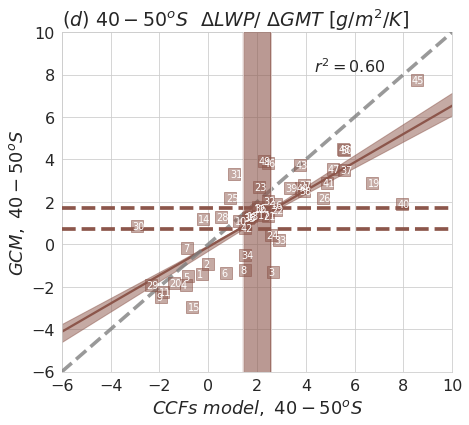

In [49]:
# Constraint on 40 -- 50^{o} S band averaged LWP response Only from OBS constraint on the warm regime in this band:


fig, axes = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51, 1)

x = linspace(-6.0, 10.00, 50)
y = x
x_axis = np.arange(-6.0, 10.00,  0.001)

x1 = y1_all_OBS_range_4050
x2 = y2_all_OBS_range_4050

# First propagated Latitudinal-Averaged constraint on d(LWP)/d(GMT) from CCF model:
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:brown", alpha = 0.6, zorder = 9)
plt.axvline(x1, c = "tab:brown", alpha = 0.6, linewidth = 1.4)
plt.axvline(x2, c = "tab:brown", alpha = 0.6, linewidth = 2)

plot_scat1 = []
plot_scat2 = []

for b in range(len(deck_nas2)):
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_all4050[b], 1000.* delta_LWP_dTg_GCM4050[b], s = 132, marker = 's', color="tab:brown", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)
    
    # Add GCM ordinal number listed in Table S1:
    axes.annotate(n_name[b], xy = (1000.* delta_LWP_dTg_LRM_all4050[b], 1000.* delta_LWP_dTg_GCM4050[b]), 
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)


# linear curve fit between Equation 3 predicted and GCM predicted latitudinal-averaged d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000. * delta_LWP_dTg_LRM_all4050, 1000. * delta_LWP_dTg_GCM4050)

# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(1000. * delta_LWP_dTg_LRM_all4050, 1000. * delta_LWP_dTg_GCM4050)[0]
R_square_2 = calc_r2(1000. * delta_LWP_dTg_LRM_all4050, 1000. * delta_LWP_dTg_GCM4050)
print("R^2: ", R_square_2)

fitp3 = axes.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:brown", linewidth = 2.3)

# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000.* delta_LWP_dTg_LRM_all4050
Y = 1000. * delta_LWP_dTg_GCM4050
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
# print(len(best_fit_lines_min))
axes.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:brown", alpha= 0.5)

# Add Reference line:
Refp = axes.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)  # Blue


# Add constraint on Latitudinal-averaged d(LWP)/d(GMT) indicated by horizontal line 2, 3:
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range2_4050 = best_fit_lines_min[index_min]
Horit2 = axes.plot(x, [y1_all_OBS_range2_4050] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range2_4050 = POPT_2[0] * x1 + POPT_2[1] 

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range2_4050 = best_fit_lines_max[index_max]
Horit2 = axes.plot(x, [y2_all_OBS_range2_4050] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y2_all_OBS_range2_4050 = POPT_2[0] * x2 + POPT_2[1]

# Add text for the R_square:
axes.text(4.150, 8.100, r" $r^{2} = %.2f $" % pearsonr_2**2, fontsize = 16)

print("OBS constraint GCM-predicted Latitudinal-averaged range minimum: ", y1_all_OBS_range2_4050)
print("OBS constraint GCM-predicted Latitudinal-averaged range maximum: ", y2_all_OBS_range2_4050)

axes.set_xlim([-6.0, 10.00])
axes.set_ylim([-6.0, 10.00])
axes.set_xlabel(r"$ CCFs\ model,\ 40-50^{o}S$")
axes.set_ylabel(r"$ GCM,\ 40-50^{o}S$")
axes.set_title( r"$ (d)\ {40-50^{o}S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(d)_4050.jpg', bbox_inches = 'tight', dpi = 500)

# Determine the OBS range of 'ALL' Regime Constraint; 

OBS_range_model2 = []
for b in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_all4050[b] >= x1) & (1000.* delta_LWP_dTg_LRM_all4050[b] <= x2):
        
        OBS_range_model2.append(int(b))

print(OBS_range_model2)


OBS_range_MODEL_common = []

for J in range(len(OBS_range_model2)):
    
    if OBS_range_model2[J] in OBS_range_model1:
        
        OBS_range_MODEL_common.append(OBS_range_model2[J])

print(OBS_range_MODEL_common)

print(np.max(1000.* delta_LWP_dTg_GCM4050), np.min(1000.* delta_LWP_dTg_GCM4050))

minimum x1 index: 14
x1: 1.6872733260455108 x2: 4.150550659344861
Correlation coefficient(r):  0.7975497171994338
5%-95% bounds of jackknife_Slope: 0.7177766883287011 - 0.7447328351150388
5%-95% bounds of jackknife_y_intercept: 1.6560841135799236 - 1.8053228831419683
14000
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum:  2.8391471169972093
OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum:  4.802092841295143
[2, 8, 9, 10, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 28, 30, 32, 33, 34, 35]


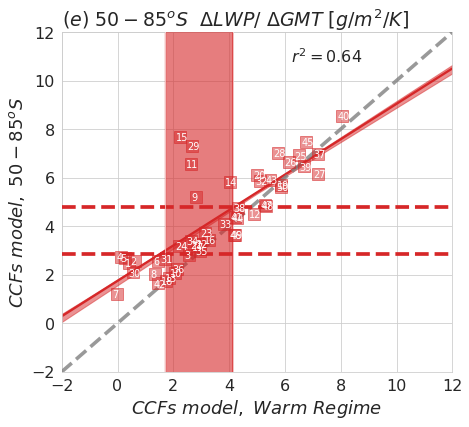

In [50]:
# Constraint on 50 -- 85^{o} S band averaged LWP response Only from OBS constraint on the warm regime in this band:


fig2, axes2 = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51, 1)

x = linspace(-2.0, 12.00, 50)
y = x
x_axis = np.arange(-2.0, 12.00, 0.001)

x1 = np.min(1000.* delta_LWP_dTg_OBS_warm5085)
print('minimum x1 index:', np.argmin(1000.* delta_LWP_dTg_OBS_warm5085))
x2 = np.max(1000.* delta_LWP_dTg_OBS_warm5085)
print("x1:", x1, "x2:", x2)

# Observational constraint on Warm regime d(LWP)/d(GMT):
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:red", alpha = 0.6, zorder = 9)
plt.axvline(x1, c = "tab:red", alpha = 0.6, linewidth = 1.4)
plt.axvline(x2, c = "tab:red", alpha = 0.6, linewidth = 2)

plot_scat1 = []
plot_scat2 = []

for a in range(len(deck_nas2)):
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_warm5085[a], 1000.* delta_LWP_dTg_LRM_all5085[a], s = 134, marker = 's', color="tab:red", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)
    
    # Add GCM ordinal number listed in Table S1:
    axes2.annotate(n_name[a], xy=(1000.* delta_LWP_dTg_LRM_warm5085[a], 1000.* delta_LWP_dTg_LRM_all5085[a]),
            xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)


# linear curve fit between Equation 3 predicted latitudinal-averaged d(LWP)/d(GMT) and warm regime d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000.* delta_LWP_dTg_LRM_warm5085, 1000. * delta_LWP_dTg_LRM_all5085)

# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(1000. * delta_LWP_dTg_LRM_warm5085, 1000. *delta_LWP_dTg_LRM_all5085)[0]
R_square_2 = calc_r2(1000.* delta_LWP_dTg_LRM_warm5085, 1000.* delta_LWP_dTg_LRM_all5085)
print("Correlation coefficient(r): ", pearsonr_2)

fitp3 = axes2.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:red", linewidth = 2.3)


# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000.* delta_LWP_dTg_LRM_warm5085
Y = 1000.* delta_LWP_dTg_LRM_all5085
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
print(len(best_fit_lines_min))
axes2.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:red", alpha= 0.5)

# Add Reference line:
Refp = axes2.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)

# Add constraint on Latitudinal-averaged d(LWP)/d(GMT) indicated by horizontal line 2, 3
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range_5085 = best_fit_lines_min[index_min]
Horit2 = axes2.plot(x, [y1_all_OBS_range_5085] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range = POPT_2[0] * x1 + POPT_2[1]

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range_5085 = best_fit_lines_max[index_max]
Horit3 = axes2.plot(x, [y2_all_OBS_range_5085] * 50, c = "tab:red", linestyle = '--', linewidth = 3.7, zorder = 7)
# y2_all_OBS_range = POPT_2[0] * x2 + POPT_2[1]

# Add text for the Correlation coeffcient:
axes2.text(6.206, 10.750, r"$r^{2} = %.2f $" % pearsonr_2**2, fontsize = 16)

print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) minimum: ", y1_all_OBS_range_5085)
print("OBS constraint on Equation-3 predicted Latitudinal-averaged d(LWP)/d(GMT) maximum: ", y2_all_OBS_range_5085)

axes2.set_xlim(-2.0, 12.00)
axes2.set_ylim(-2.0, 12.00)
axes2.set_xlabel(r"$ CCFs\ model,\ Warm\ Regime$")
axes2.set_ylabel(r"$ CCFs\ model,\ 50-85^{o}S$")
axes2.set_title( r"$ (e)\ {50-85^{o}S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(e)_5085.jpg', bbox_inches = 'tight', dpi = 500)

# determine the OBS range of 'Warm' Regime constraint,
OBS_range_model1 = []
for a in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_warm5085[a] > x1) & (1000.* delta_LWP_dTg_LRM_warm5085[a] < x2):
        
        OBS_range_model1.append(int(a))

print(OBS_range_model1)

R^2:  0.6704592846028457
5%-95% bounds of jackknife_Slope: 1.1780931940136945 - 1.2069850951428887
5%-95% bounds of jackknife_y_intercept: 0.08778557251756562 - 0.2225927029334151
OBS constraint GCM-predicted Latitudinal-averaged range minimum:  3.3939433184479544
OBS constraint GCM-predicted Latitudinal-averaged range maximum:  5.9444008156599875
[11, 15, 16, 20, 21, 22, 23, 32, 33, 34, 37, 40, 43, 45, 48]
[15, 16, 20, 21, 22, 23, 32, 33, 34]
10.506552820328105 1.1447514633385318


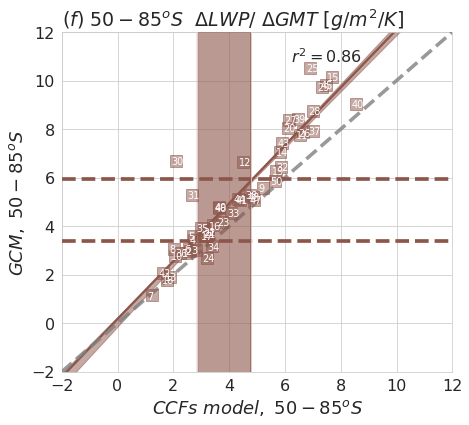

In [51]:
# Constraint on 50 -- 85^{o} S band averaged LWP response from the constriant on CCF model predicted latitudinal-averaged LWP response:

fig, axes = plt.subplots(1, 1, figsize = (7.0, 6.25))

n_name = np.arange(1, 51, 1)

x = linspace(-2.0, 12.00, 50)
y = x 
x_axis = np.arange(-2.0, 12.00, 0.001)

x1 = y1_all_OBS_range_5085
x2 = y2_all_OBS_range_5085

# First propagated Latitudinal-Averaged constraint on d(LWP)/d(GMT) from CCF model:
plt.axvspan(x1, x2, np.min(y), np.max(y), facecolor = "tab:brown", alpha = 0.6, zorder = 9)
plt.axvline(x1, c = "tab:brown", alpha = 0.6, linewidth = 1.4)
plt.axvline(x2, c = "tab:brown", alpha = 0.6, linewidth = 2)

plot_scat1 = []
plot_scat2 = []

for b in range(len(deck_nas2)):
    
    scp1 = plt.scatter(1000.* delta_LWP_dTg_LRM_all5085[b], 1000.* delta_LWP_dTg_GCM5085[b], s = 132, marker = 's', color="tab:brown", alpha = 0.50, zorder = 12)
    plot_scat1.append(scp1)
    
    # Add GCM ordinal number listed in Table S1:
    axes.annotate(n_name[b], xy = (1000.* delta_LWP_dTg_LRM_all5085[b], 1000.* delta_LWP_dTg_GCM5085[b]), 
                xytext=(-4.60, -3.42), textcoords = "offset points", color = 'white', fontsize = 9.8, zorder = 99)
    
# linear curve fit between Equation 3 predicted and GCM predicted latitudinal-averaged d(LWP)/d(GMT):
POPT_2, POCV_2 = curve_fit(target_func, 1000. * delta_LWP_dTg_LRM_all5085, 1000. * delta_LWP_dTg_GCM5085)


# Calc the R square, plot the fit line:
pearsonr_2 = pearsonr(1000. * delta_LWP_dTg_LRM_all5085, 1000. * delta_LWP_dTg_GCM5085)[0]
R_square_2 = calc_r2(1000. * delta_LWP_dTg_LRM_all5085, 1000. * delta_LWP_dTg_GCM5085)
print("R^2: ", R_square_2)

fitp3 = axes.plot(y, POPT_2[0] * x + POPT_2[1], linestyle = '-', color = "tab:brown", linewidth = 2.3)

# Add jackknife estimated uncertainty as shading on the fitting line:
X = 1000. * delta_LWP_dTg_LRM_all5085
Y = 1000. * delta_LWP_dTg_GCM5085
best_fit_lines_min, best_fit_lines_max = Jackknife(X, Y, x_axis)
# print(len(best_fit_lines_min))
axes.fill_between(x_axis, best_fit_lines_min, best_fit_lines_max, color = "tab:brown", alpha= 0.5)

# Add Reference line:
Refp = axes.plot(x, y, label = "1-1 reference line", c = 'gray', linestyle= '--', alpha = 0.8, linewidth = 3.6, zorder = 5)

# Add Reference line 2, 3
index_min = np.argmin(np.abs(x_axis - x1))
y1_all_OBS_range2_5085 = best_fit_lines_min[index_min]
Horit2 = axes.plot(x, [y1_all_OBS_range2_5085] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y1_all_OBS_range2_5085 = POPT_2[0] * x1 + POPT_2[1]

index_max = np.argmin(np.abs(x_axis - x2))
y2_all_OBS_range2_5085 = best_fit_lines_max[index_max]
Horit2 = axes.plot(x, [y2_all_OBS_range2_5085] * 50, c = "tab:brown", linestyle = '--', linewidth = 3.7, zorder = 8)
# y2_all_OBS_range2_5085 = POPT_2[0] * x2 + POPT_2[1]

# Add text for the R_square:
axes.text(6.206, 10.750, r"$r^{2} = %.2f$" % pearsonr_2**2, fontsize = 16)

print("OBS constraint GCM-predicted Latitudinal-averaged range minimum: ", y1_all_OBS_range2_5085)
print("OBS constraint GCM-predicted Latitudinal-averaged range maximum: ", y2_all_OBS_range2_5085)

axes.set_xlim([-2.0, 12.00])
axes.set_ylim([-2.0, 12.00])
axes.set_xlabel(r"$ CCFs\ model,\ {50- 85^{o}S}$")
axes.set_ylabel(r"$ GCM,\ {50- 85^{o}S}$")

axes.set_title( r"$ (f)\ {50- 85^{o}S}\ \ \Delta LWP/\ \Delta GMT\ [g/m^{2}/K] $", loc ='left')

# sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.savefig(path6 + 'Fig_6_(f)_5085.jpg', bbox_inches = 'tight', dpi = 500)

# Determine the OBS range of 'ALL' Regime Constraint; 

OBS_range_model2 = []
for b in range(len(deck_nas2)):
    
    if (1000.* delta_LWP_dTg_LRM_all5085[b] >= x1) & (1000.* delta_LWP_dTg_LRM_all5085[b] <= x2):
        
        OBS_range_model2.append(int(b))

print(OBS_range_model2)

OBS_range_MODEL_common = []

for J in range(len(OBS_range_model2)):
    
    if OBS_range_model2[J] in OBS_range_model1:
        
        OBS_range_MODEL_common.append(OBS_range_model2[J])

print(OBS_range_MODEL_common)
print(np.max(1000.* delta_LWP_dTg_GCM5085), np.min(1000.* delta_LWP_dTg_GCM5085))